In [1]:
%pylab inline
import numpy as np
from sklearn import datasets
from matplotlib import pyplot as plt
from sklearn.cross_validation import train_test_split
#import seaborn

Populating the interactive namespace from numpy and matplotlib


/usr/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


##### Загружаем dataset

In [2]:
iris = datasets.load_iris()
data = iris['data']

In [10]:
iris

{'DESCR': 'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ==

In [11]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#### Постройте 2 графика 
1. По оси X -- Sepal length, по оси Y -- Sepal width
2. По оси X -- Petal length, по оси Y -- Petal width

Тип ириса отобразить цветом

In [22]:
# example

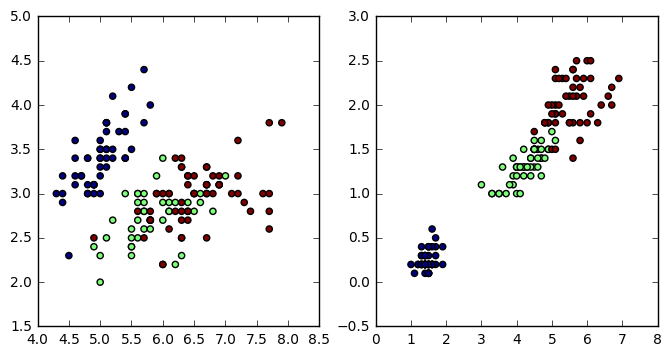

In [23]:
plt.figure(figsize = (8, 4))
plt.subplot(121)
plt.scatter(data[:, 0], data[:, 1], c = iris['target'])
plt.subplot(122)
plt.scatter(data[:, 2], data[:, 3], c = iris['target'])

Будем строить логистическую регрессию, который определяет относится ли ирис к типу setosa. Для этого, преобразуем исходный вектор iris['target'] следующим образом:
1. Для наблюдений с меткой setosa поставим -- 1
2. Для всех остальных наблюдений -- 0

In [8]:
iris['setosa_target'] = [int(i==0) for i in iris['target']]

#### Разделим данные на обучающую и тестовые выборки

In [9]:
X = data
y = iris['setosa_target']

In [10]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

##### Реализуйте функцию sigmoid

In [75]:
def sigmoid(z):
    return 1 / (1 + exp(-z))

##### Реализуйте функцию потерь (J)

In [76]:
def h(x, theta):
    return sigmoid(sum([x[j] * theta[j] for j in xrange(len(x))]))

In [77]:
def compute_cost(X, y, theta): 
    J = 0
    for i in xrange(len(X)):
        prob = h(X[i], theta)
        J -= y[i] * log(prob)
        J -= (1 - y[i]) * log(1 - prob)
    J /= len(X)
    return J

#### Реализуйте функцию градиента целевой функции логистической регрессии

In [74]:
[sum([X[i, j] * theta[j] for j in xrange(len(X[i]))]) for i in xrange(len(X))]

[-0.49364074433408245,
 -0.61908748659876545,
 -0.45649589700874305,
 -0.48342840272565379,
 -0.4182004798575889,
 -0.35587775910279118,
 -0.29184652403251365,
 -0.50886218941395833,
 -0.4787381109743003,
 -0.65276806745323723,
 -0.53429597610226287,
 -0.44864337001734034,
 -0.6445673912590425,
 -0.42960950926380526,
 -0.52459658087946237,
 -0.24297383558086474,
 -0.30903351655465128,
 -0.43219589965697869,
 -0.56469274829004146,
 -0.32548098691501237,
 -0.67614407075533445,
 -0.30351146669757567,
 -0.22749647724214311,
 -0.4233900411332106,
 -0.48377655192844526,
 -0.67847454788966177,
 -0.39768356069678579,
 -0.54131674498794424,
 -0.56908100881057644,
 -0.49162907891984797,
 -0.56706934339634174,
 -0.52983226012705698,
 -0.3659096429070452,
 -0.36117323318371836,
 -0.65276806745323723,
 -0.55267965642218742,
 -0.62578944376435353,
 -0.65276806745323723,
 -0.42755172587759815,
 -0.54482712943078482,
 -0.38451989900311734,
 -0.67839909243499097,
 -0.34860107695826381,
 -0.235318546882

In [78]:
def cost_function_gradient(X, y, theta):
    gradient = np.empty(len(theta))
    for j in xrange(len(gradient)):
        for i in xrange(len(X)):
            gradient[j] += (h(X[i], theta) - y[i]) * X[i, j]
    gradient /= len(X)
    return gradient

In [79]:
cost_function_gradient(X, y, [1, 1, 2, 1])

array([ 4.16049903,  1.92254749,  3.26667871,  1.12470575])

#### Реализуйте градиентный спуск

In [80]:
def gradient_descent( alpha, X, y, tol, max_iter):
    theta = np.full(len(X[0]), 1)
    cost_values = []
    for iteration in xrange(max_iter):
        imp = alpha * cost_function_gradient(X, y, theta)
        theta = theta - imp
        cost_values.append(compute_cost(X, y, theta))
        if (abs(imp) < tol).all():
            break
    return theta, cost_values

Запустите функцию с разными параметрами. Постройте график cost_function_values

In [81]:
theta, cost_func = gradient_descent( 0.01, X_train, y_train, 0.01, 100)
print theta
print len(cost_func)

[-0.3596494   0.39475324 -0.11711061  0.61444845]
39


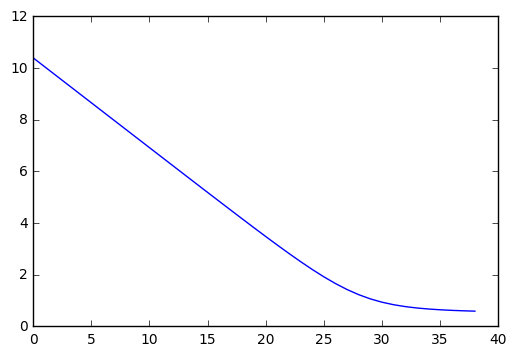

In [82]:
plt.plot(cost_func)

##### Реализуйте функцию, которая предсказывает класс и вычисляет вероятность наблюдению принадлежать целевому классу

In [83]:
cost_function_gradient(X, y, theta)

array([ 0.39313009, -0.03915429,  4.26447148,  2.71740002])

In [68]:
def predict(theta, X, threshold):
    probs = [h(elem, theta) for elem in X]
    labels = [int(prob >= threshold) for prob in probs]

    return labels, probs

In [69]:
predict(theta, X, 0.5)

([0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0.37903627715155985,
  0.34998901679073624,
  0.38781742296360788,
  0.38144288532391779,
  0.39694743958701112,
  0.41195780920763325,
  0.42755186763111952,
  0.37546029274770981,
  0.3825501461903496,
  0.34236603103567437,
  0.3695154783914871

#### Реализуйте функцию, которая вычисляет accuracy

In [548]:
def accuracy(true_value, predicted_value):
    accuracy = 0
    return accuracy

In [549]:
train_predicted_label, train_predicted_prob = predict(array(theta), X_train, 0.5)
print 'Train Accuracy: %f' % (accuracy(y_train, train_predicted_label))
test_predicted_label, test_predicted_prob  = predict(array(theta), X_test, 0.5)
print 'Test Accuracy: %f' % (accuracy(y_test, test_predicted_label))

Train Accuracy: 100.000000
Test Accuracy: 100.000000
